In [2]:
!pip install pandas

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install opencv-python

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install -U scikit-learn

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [12]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [14]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [17]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 74s 74ms/step - loss: 2.2123 - accuracy: 0.4417 - val_loss: 0.5927 - val_accuracy: 0.8554
Epoch 2/15
981/981 [==============================] - 75s 76ms/step - loss: 0.8188 - accuracy: 0.7635 - val_loss: 0.2780 - val_accuracy: 0.9305
Epoch 3/15
981/981 [==============================] - 74s 76ms/step - loss: 0.5057 - accuracy: 0.8500 - val_loss: 0.2079 - val_accuracy: 0.9415
Epoch 4/15
981/981 [==============================] - 75s 77ms/step - loss: 0.4019 - accuracy: 0.8814 - val_loss: 0.1275 - val_accuracy: 0.9639
Epoch 5/15
981/981 [==============================] - 69s 71ms/step - loss: 0.3434 - accuracy: 0.9024 - val_loss: 0.1043 - val_accuracy: 0.9688
Epoch 6/15
981/981 [==============================] - 65s 66ms/step - loss: 0.3188 - accuracy: 0.9082 - val_loss: 0.0821 - val_accuracy: 0.9764
Epoch 7/15
981/981 [==============================] - 65s 66ms/step - loss: 0.2809 - accuracy: 0.9183 - val_loss: 0.0762 - val_accuracy:

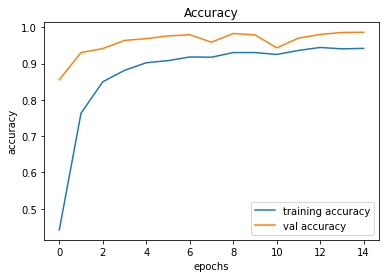

In [18]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

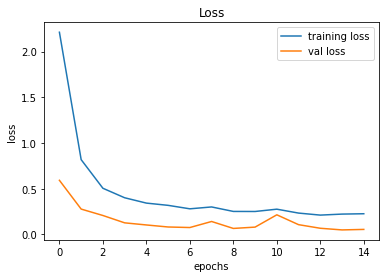

In [19]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)

predict_x = model.predict(X_test) 
pred = np.argmax(predict_x,axis=1)

# pred = model.predict_classes(X_test)

In [23]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

0.9570071258907363


In [25]:
model.save('traffic_classifier.h5')